In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import dask.dataframe as dd
from matplotlib import rcParams
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# Feature Transformations

In [ ]:
#Read df_new csv file
df_new = pd.read_csv('df_new.csv')

## Split data train and test

In [ ]:
from sklearn.model_selection import train_test_split
# define X and y
X = df_new.drop('Churn', axis=1)
y = df_new['Churn']
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Balancing Data

In [ ]:
# data balancing
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# Modeling

## Logistic Regression Model

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.7743080198722498
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.79      0.84      1036
           1       0.56      0.73      0.63       373

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409



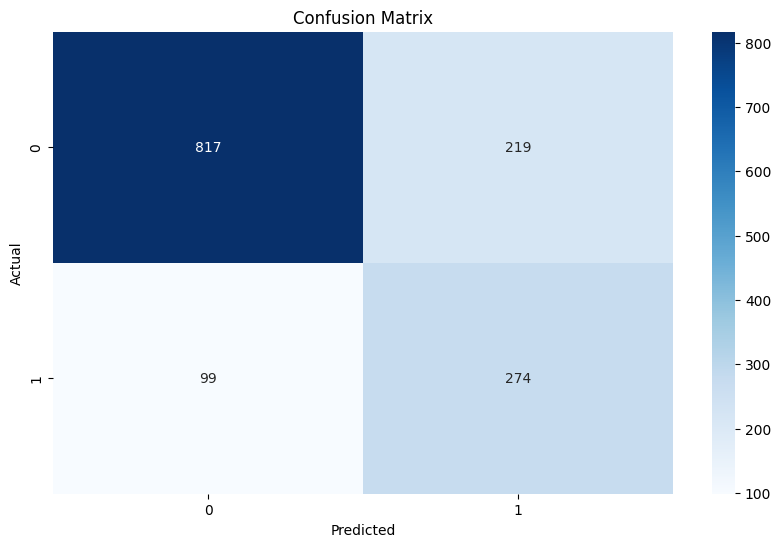

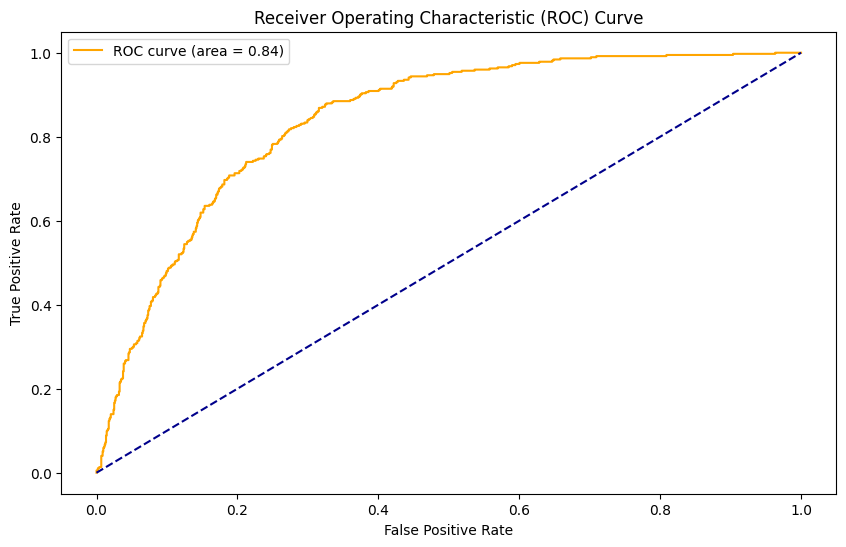

In [ ]:
# train model using Logistic Regression
from sklearn.linear_model import LogisticRegression

# Train Model
model_LR = LogisticRegression(max_iter=1000)
model_LR.fit(X_train, y_train)

# Predict
y_pred_LR = model_LR.predict(X_test)

# Evaluate Model
accuracy_LR = accuracy_score(y_test, y_pred_LR)
precision_LR = precision_score(y_test, y_pred_LR, average="weighted")
recall_LR = recall_score(y_test, y_pred_LR, average="weighted")
f1_LR = f1_score(y_test, y_pred_LR, average="weighted")

print('Accuracy: ', accuracy_LR)
print('Classification Report: \n', classification_report(y_test, y_pred_LR))

# confusion matrix
conf_matrix_LR = confusion_matrix(y_test, y_pred_LR)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_LR, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# check model performance using ROC AUC
y_pred_prob = model_LR.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Random Forest Model

Accuracy:  0.7672107877927609
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.82      0.84      1036
           1       0.56      0.61      0.58       373

    accuracy                           0.77      1409
   macro avg       0.70      0.72      0.71      1409
weighted avg       0.77      0.77      0.77      1409



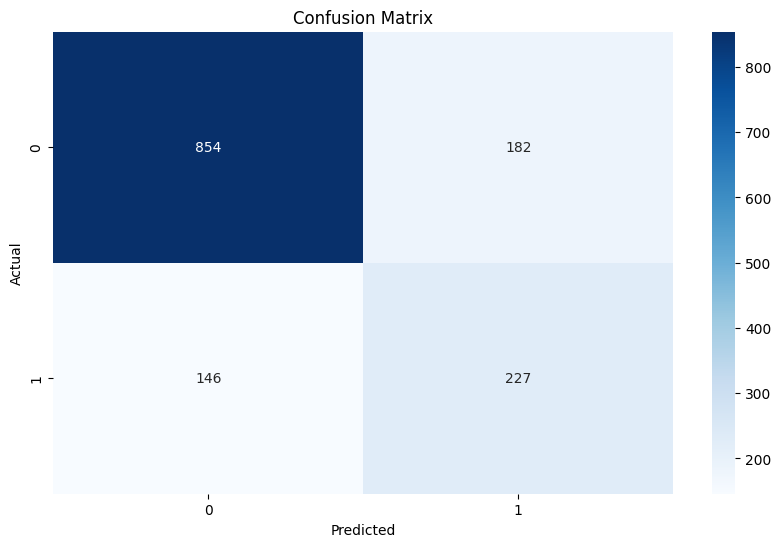

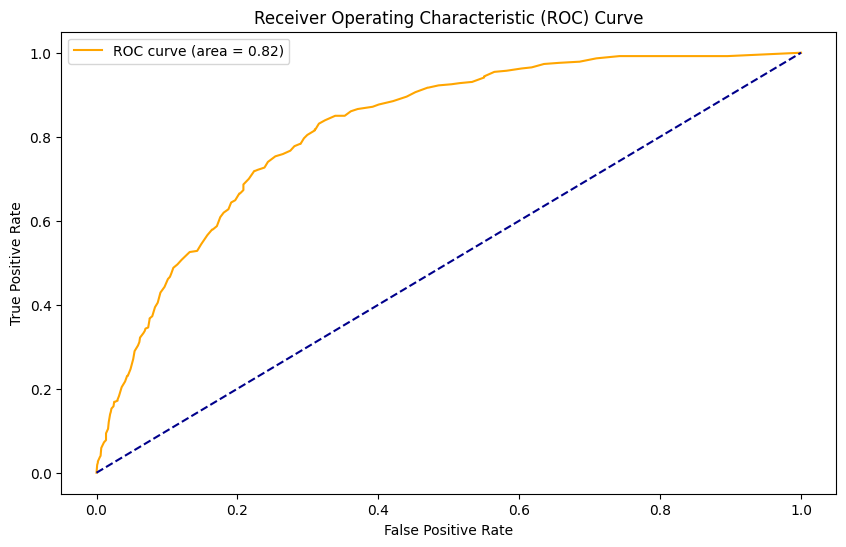

In [ ]:
# train model using Random Forest
from sklearn.ensemble import RandomForestClassifier

# Train Model
model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)

# Predict
y_pred_RF = model_RF.predict(X_test)

# Evaluate Model
accuracy_RF = accuracy_score(y_test, y_pred_RF)
precision_RF = precision_score(y_test, y_pred_RF, average="weighted")
recall_RF = recall_score(y_test, y_pred_RF, average="weighted")
f1_RF = f1_score(y_test, y_pred_RF, average="weighted")

print('Accuracy: ', accuracy_RF)
print('Classification Report: \n', classification_report(y_test, y_pred_RF))

# confusion matrix
conf_matrix_RF = confusion_matrix(y_test, y_pred_RF)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_RF, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# check model performance using ROC AUC
y_pred_prob = model_RF.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Decision Tree Model

Accuracy:  0.7601135557132718
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.79      0.83      1036
           1       0.54      0.68      0.60       373

    accuracy                           0.76      1409
   macro avg       0.70      0.73      0.71      1409
weighted avg       0.78      0.76      0.77      1409



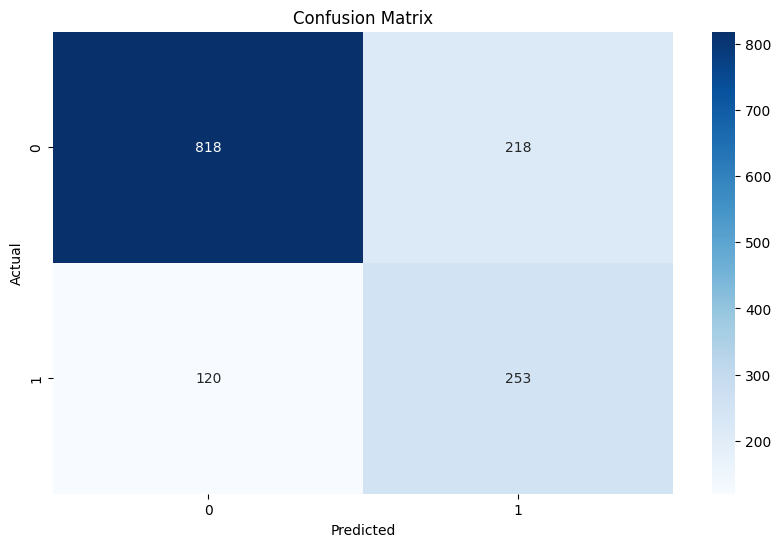

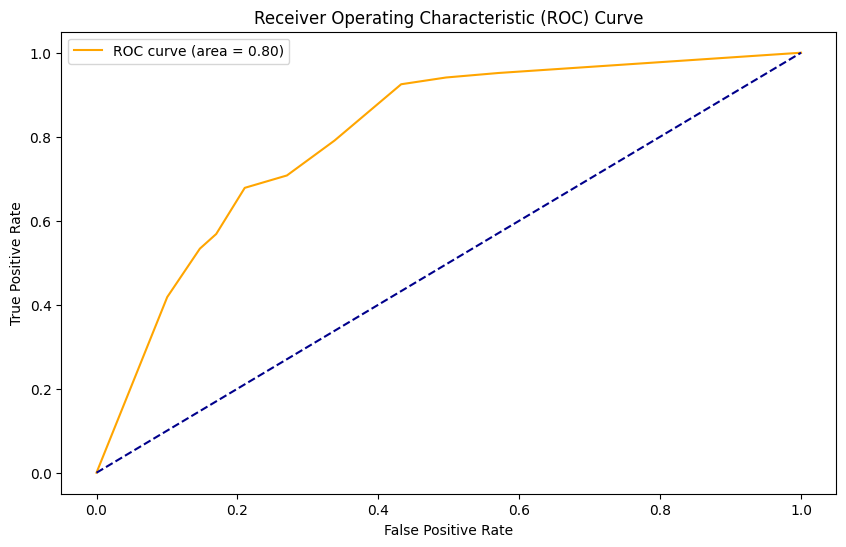

In [ ]:
# train model using Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Train Model
model_DT = DecisionTreeClassifier(random_state=42, max_leaf_nodes = 10, criterion = 'gini')
model_DT.fit(X_train, y_train)

# Predict
y_pred_DT = model_DT.predict(X_test)

# Evaluate Model
accuracy_DT = accuracy_score(y_test, y_pred_DT)
precision_DT = precision_score(y_test, y_pred_DT, average="weighted")
recall_DT = recall_score(y_test, y_pred_DT, average="weighted")
f1_DT = f1_score(y_test, y_pred_DT, average="weighted")

print('Accuracy: ', accuracy_DT)
print('Classification Report: \n', classification_report(y_test, y_pred_DT))

# confusion matrix
conf_matrix_DT = confusion_matrix(y_test, y_pred_DT)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_DT, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# check model performance using ROC AUC
y_pred_prob = model_DT.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Melihat banyak tree yang akan digunakan

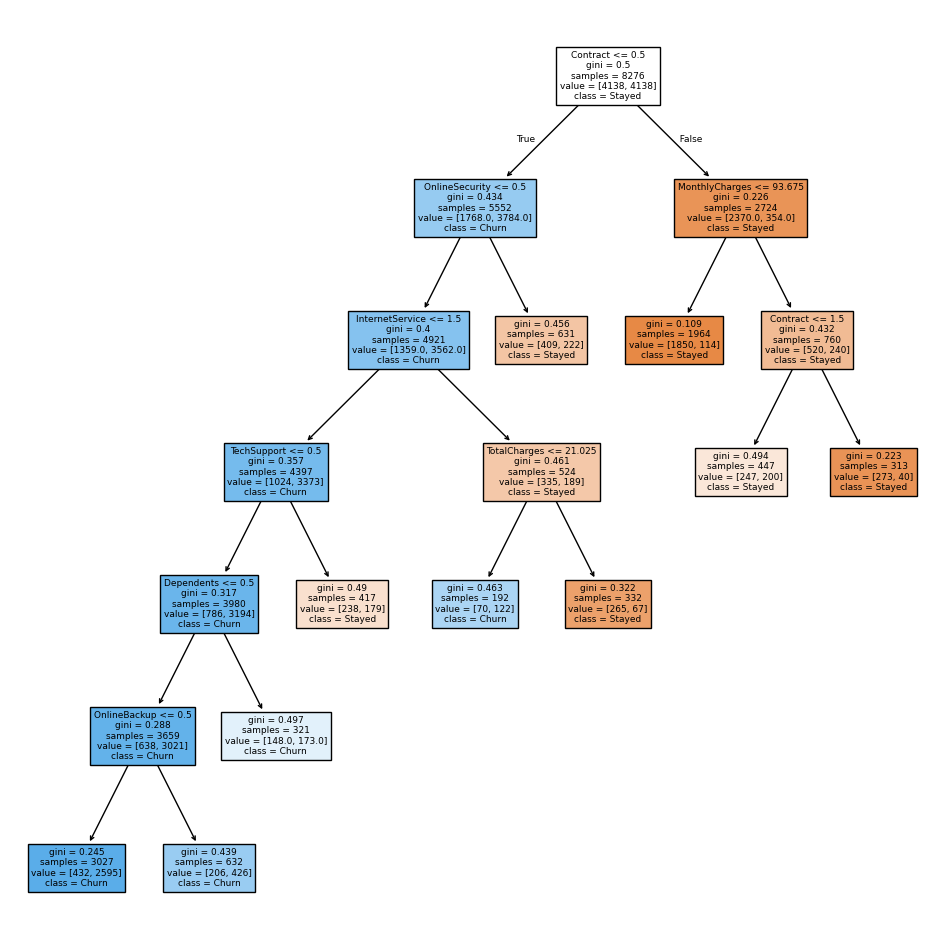

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

# Membuat plot pohon keputusan
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(
    model_DT,
    feature_names = model_DT.feature_names_in_,
    class_names = ['Stayed', 'Churn'],
    filled=True
)

plt.show()

# Alternative Models

## KNN Model

Accuracy:  0.7132718239886444
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.72      0.79      1036
           1       0.47      0.69      0.56       373

    accuracy                           0.71      1409
   macro avg       0.67      0.70      0.67      1409
weighted avg       0.76      0.71      0.73      1409



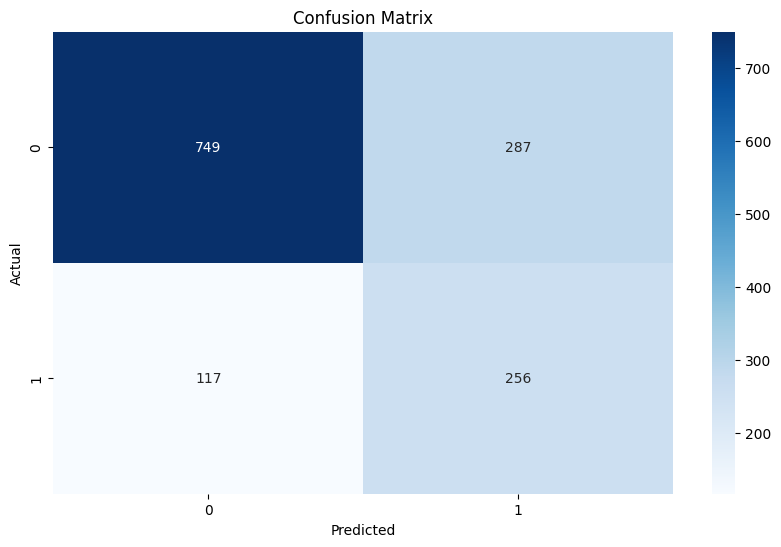

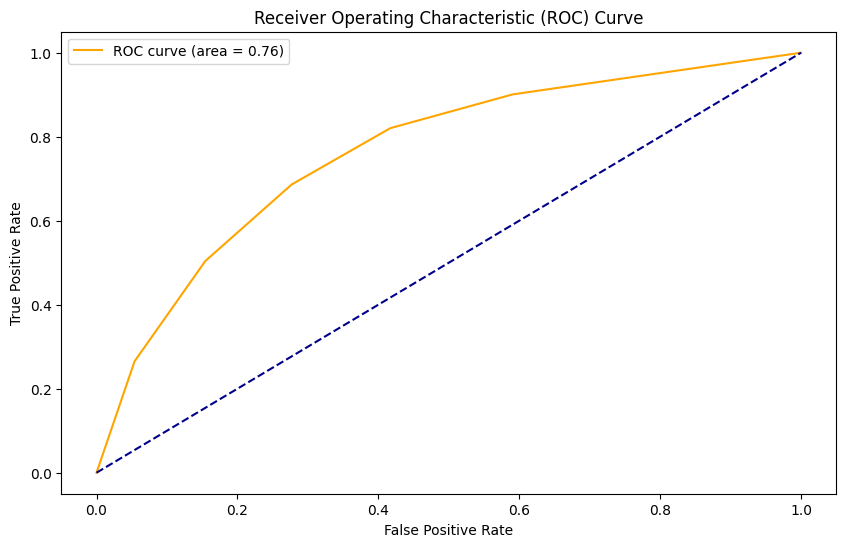

In [ ]:
# train model using KNN
from sklearn.neighbors import KNeighborsClassifier

# Train Model
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, y_train)

# Predict
y_pred_KNN = model_KNN.predict(X_test)

# Evaluate Model
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
precision_KNN = precision_score(y_test, y_pred_KNN, average="weighted")
recall_KNN = recall_score(y_test, y_pred_KNN, average="weighted")
f1_KNN = f1_score(y_test, y_pred_KNN, average="weighted")

print('Accuracy: ', accuracy_KNN)
print('Classification Report: \n', classification_report(y_test, y_pred_KNN))

# confusion matrix
conf_matrix_KNN = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_KNN, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# check model performance using ROC AUC
y_pred_prob = model_KNN.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## XGBoost Model

Accuracy:  0.7785663591199432
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      1036
           1       0.58      0.61      0.59       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



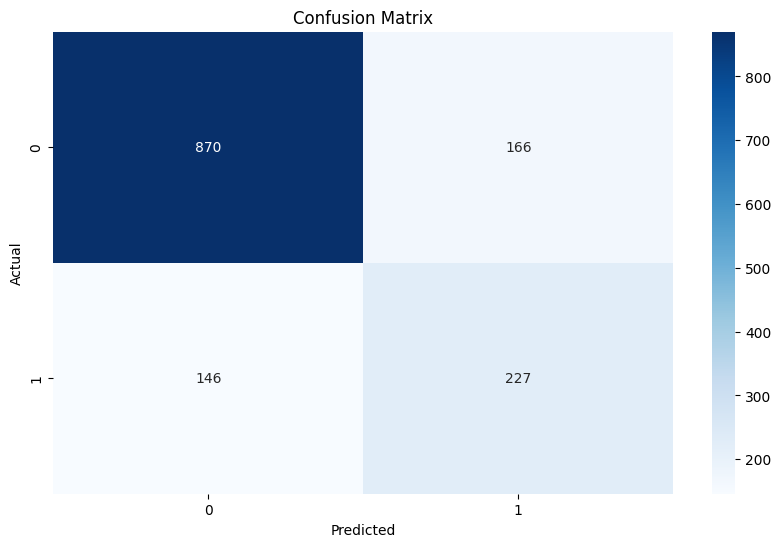

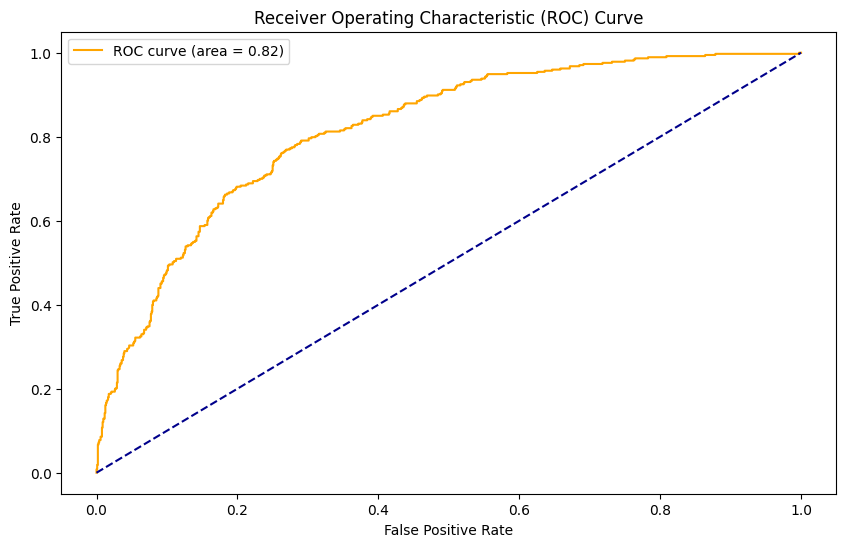

In [ ]:
# train model using XGBoost
from xgboost import XGBClassifier

# Train Model
model_XGB = XGBClassifier()
model_XGB.fit(X_train, y_train)

# Predict
y_pred_XGB = model_XGB.predict(X_test)

# Evaluate Model
accuracy_XGB = accuracy_score(y_test, y_pred_XGB)
precision_XGB = precision_score(y_test, y_pred_XGB, average="weighted")
recall_XGB = recall_score(y_test, y_pred_XGB, average="weighted")
f1_XGB = f1_score(y_test, y_pred_XGB, average="weighted")

print('Accuracy: ', accuracy_XGB)
print('Classification Report: \n', classification_report(y_test, y_pred_XGB))

# confusion matrix
conf_matrix_XGB = confusion_matrix(y_test, y_pred_XGB)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_XGB, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# check model performance using ROC AUC
y_pred_prob = model_XGB.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Result

In [ ]:
from tabulate import tabulate

# Menyusun data hasil evaluasi ke dalam tabel
results = [{
    "Model": "Logistic Regression",
    "Accuracy": accuracy_LR,
    "Precision": precision_LR,
    "Recall": recall_LR,
    "F1 Score": f1_LR,
},
           {
    "Model": "Random Forest",
    "Accuracy": accuracy_RF,
    "Precision": precision_RF,
    "Recall": recall_RF,
    "F1 Score": f1_RF,
},
{
    "Model": "Decision Tree",
    "Accuracy": accuracy_DT,
    "Precision": precision_DT,
    "Recall": recall_DT,
    "F1 Score": f1_DT,
},
{
    "Model": "K-Nearest Neighbors",
    "Accuracy": accuracy_KNN,
    "Precision": precision_KNN,
    "Recall": recall_KNN,
    "F1 Score": f1_KNN,
},
{
    "Model": "XGBoost",
    "Accuracy": accuracy_XGB,
    "Precision": precision_XGB,
    "Recall": recall_XGB,
    "F1 Score": f1_XGB,
}]

# Menampilkan tabel hasil evaluasi
df_results = pd.DataFrame(results)
print(tabulate(df_results, headers="keys", tablefmt="fancy_grid"))

╒════╤═════════════════════╤════════════╤═════════════╤══════════╤════════════╕
│    │ Model               │   Accuracy │   Precision │   Recall │   F1 Score │
╞════╪═════════════════════╪════════════╪═════════════╪══════════╪════════════╡
│  0 │ Logistic Regression │   0.774308 │    0.802936 │ 0.774308 │   0.783008 │
├────┼─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│  1 │ Random Forest       │   0.767211 │    0.77485  │ 0.767211 │   0.770511 │
├────┼─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│  2 │ Decision Tree       │   0.760114 │    0.783408 │ 0.760114 │   0.768086 │
├────┼─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│  3 │ K-Nearest Neighbors │   0.713272 │    0.760742 │ 0.713272 │   0.727065 │
├────┼─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│  4 │ XGBoost             │   0.778566 │    0.782522 │ 0.778566 │   0.780378 │
╘════╧═════════════════════╧════════════

# Feature Importance